In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import *

sns.set(rc={'figure.figsize':(11.7,8.27)})
#датасеты
df = pd.read_csv('../matrix_mul/tests_final1.txt')
df_opt_par = pd.read_csv('../matrix_mul/tests_opt_par_1.csv')

In [23]:
df['time'] = df.time / 1000.0
df = df.groupby(['V', 'algorithmId']).apply(
  lambda x: x.loc[
    x.time.between(x.time.quantile(.25), x.time.quantile(.75))
  ]
).reset_index(drop=True)
df_opt_par = df_opt_par.groupby(['V', 'boundary']).apply(
  lambda x: x.loc[
    x.time.between(x.time.quantile(.25), x.time.quantile(.75))
  ]
).reset_index(drop=True)
#df.time[(df.V == 50) & (df.algorithmId == 1)]

In [24]:
print("Усредненные результаты по каждому тесту")
df.groupby(['V', 'algorithmId']).agg({'time':'mean', 'V':'count'})

Усредненные результаты по каждому тесту


time  V
V    algorithmId                  
50   1                 2.020500  4
     2                 7.280000  4
250  1               951.354500  4
     2               929.584750  4
400  1              4817.794250  4
     2              5324.511000  4
500  1             12449.677667  3
     2              5487.183333  3
600  1             18645.829000  2
     2             29107.027500  2
700  1             36910.299000  2
     2             39452.061500  2
750  1             41817.907500  2
     2             35397.632000  2
800  1             49220.119000  2
     2             31812.595500  2
850  1             54775.915500  2
     2             31149.216500  2
900  1             65373.724000  2
     2             35165.896500  2
1000 1            123239.270000  1
     2             50175.808000  1
1200 1            170695.618000  1
     2            267896.283000  1
1300 1            229934.574000  1
     2            268078.080000  1
1500 1            291923.363000  1
     2            252404.207000  1
1800 1            349888.924000  1
     2            245274.087000  1
2000 1            440857.930000  1
     2            267724.861000  1

Теоретическая кривая и реальные данные (Тривиальный)


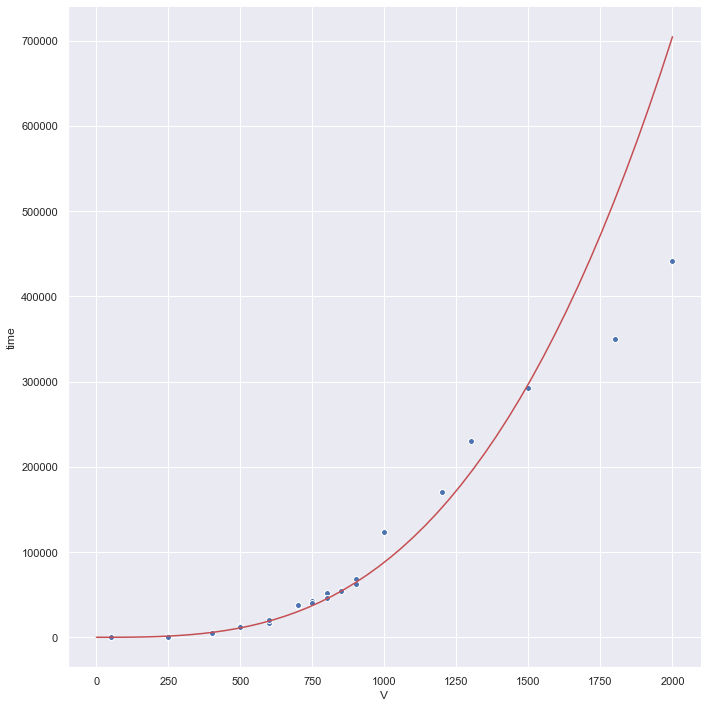

In [31]:
X_plot = np.linspace(0, 2000)
Y_plot = (4*X_plot**3 + 5*X_plot**2 + 4*X_plot + 2) * 2.2 / 100000
g = sns.FacetGrid(df[df.algorithmId==1], height = 10)
g = g.map(plt.scatter, "V", "time", edgecolor="w")
plt.plot(X_plot, Y_plot, color='r')

print("Теоретическая кривая и реальные данные (Тривиальный)")
plt.show()

Теоретическая кривая и реальные данные (Штрассен)


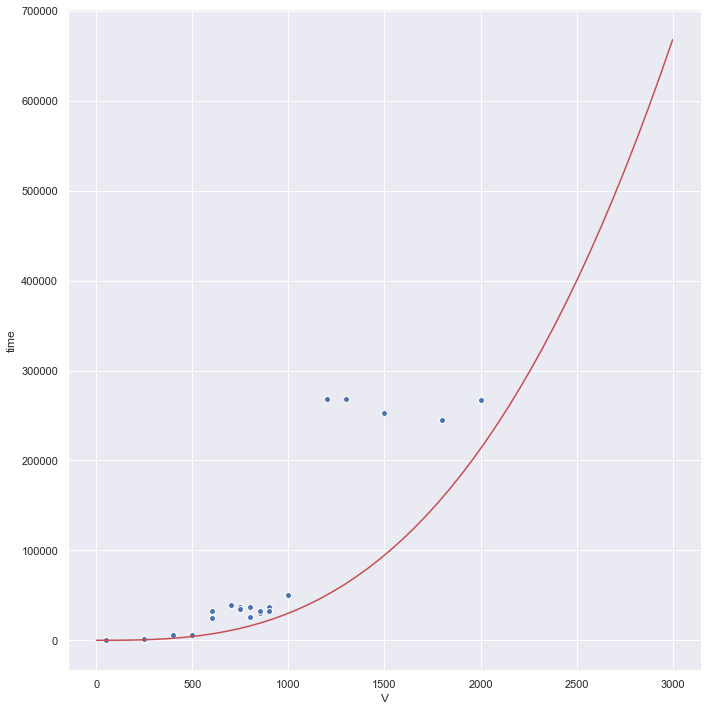

In [29]:
X_plot = np.linspace(0, 3000)
Y_plot = (3686323*(X_plot**log(7, 2))/252105 - 317*X_plot**2/3 - 188*X_plot/5 - 25) * 8 / 1000000
g = sns.FacetGrid(df[df.algorithmId==2], height = 10)
g = g.map(plt.scatter, "V", "time", edgecolor="w")
plt.plot(X_plot, Y_plot, color='r')

print("Теоретическая кривая и реальные данные (Штрассен)")
plt.show()

Сравнение 2-х алгоритмов


<AxesSubplot:xlabel='V', ylabel='time'>

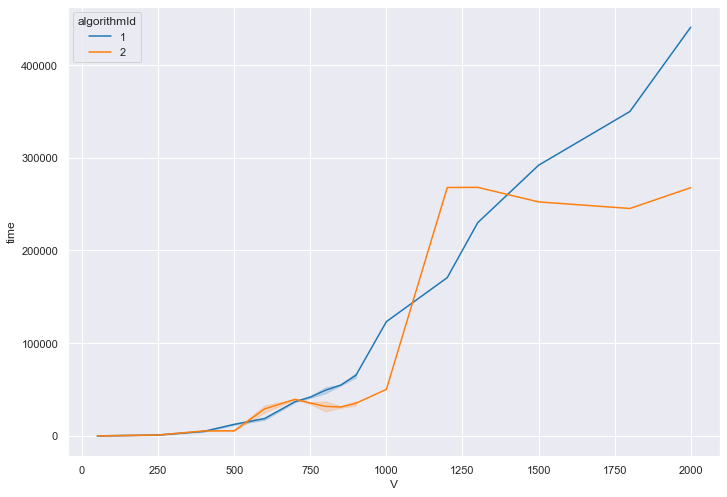

In [27]:
print("Сравнение 2-х алгоритмов")
sns.lineplot(data=df, x='V', y='time', hue='algorithmId', palette='tab10')


Подбор оптимального параметра для алгоритма Штрассена


<AxesSubplot:xlabel='V', ylabel='time'>

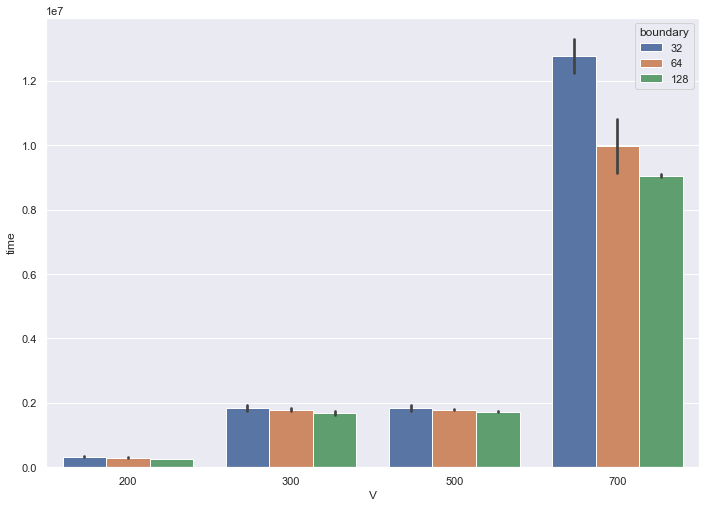

In [61]:
print("Подбор оптимального параметра для алгоритма Штрассена")
sns.barplot(data=df_opt_par, x='V', y='time', hue='boundary')